In [1]:
import ast
from functools import reduce
from gnd.basis import construct_two_body_gellmann_basis, construct_full_gellmann_basis, construct_full_pauli_basis
from gnd.data import OptimizationDataHandler
from gnd.lie import Hamiltonian
from gnd.unitaries import cnot
from gnd.hamiltonians import rydberg_hamiltonian
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

#### Load Toffoli data

In [25]:
filepath_2560 =  '../data/C2Not/' + \
                 'dqudits=3_precision=0.999999_max_steps=1000_seed=2560/' + \
                 'optimization_data.csv'
filepath_768 =  '../data/C2Not/' + \
                 'dqudits=3_precision=0.999999_max_steps=1000_seed=768/' + \
                 'optimization_data.csv'

In [26]:
filepath = filepath_768

In [3]:
target, _ = cnot(3, 3)

In [27]:
toffoli = pd.read_csv(filepath)
toffoli.head()

,sample,steps,parameters,fidelities,step_sizes
0,1,0,"[0.0022642713268088022, 0.0041772470394491525,...",0.887198,0.000000
1,1,1,"[6.320944174855814e-05, -0.1253503709047886, -...",0.930909,-0.935568
2,1,2,"[-0.03553655520395652, 0.3265915217230372, -0....",0.076560,-0.500000
3,1,3,"[0.07355270748236203, 0.20303793487682747, -0....",0.397050,-0.979886
4,1,4,"[0.15030567471163575, 0.06432574669638727, -0....",0.551128,-0.933443


In [28]:
data_loader = OptimizationDataHandler(load_data=True, load_filepath=filepath)
max_fids = data_loader.running_fidelities(1)
fids = data_loader.fidelities(1)

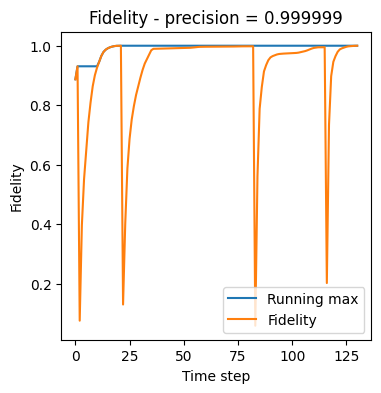

In [29]:
plt.figure(figsize=(4,4))
plt.title("Fidelity - precision = 0.999999")
plt.plot(range(len(max_fids)), max_fids, label='Running max')
plt.plot(range(len(max_fids)), fids, label='Fidelity')
plt.xlabel(f"Time step")
plt.ylabel(f"Fidelity")
#plt.yscale('log')
plt.legend()
plt.show()

In [30]:
final_parameters = toffoli.iloc[-1,:].parameters
final_parameters = ast.literal_eval(final_parameters)

In [31]:
final_parameters

[0.2327040007088155,
 0.2687226701654413,
 -6.88223453988848e-06,
 0.23271136688213562,
 -0.26871254149584145,
 0.23271910996194403,
 0.2686995675393695,
 -1.1562464485733196e-05,
 -0.46983183592613365,
 -0.08752501315220491,
 0.314752516907868,
 -5.477479316509746e-05,
 -0.08752361964846521,
 -0.3147608415704181,
 -0.08747463521364246,
 0.31466053411549394,
 -3.2946949156047005e-05,
 -0.46854446326995197,
 0.8020374073999555,
 0.023452126634577186,
 3.935481782695602e-05,
 0.8021212878093075,
 -0.023313384492940282,
 0.8020835763724138,
 0.023382163777041713,
 -6.964908199031316e-05,
 -0.12421039941070458,
 -0.4651469460438066,
 0.19442799731520174,
 -1.3868111969042324e-05,
 -0.46524747807591493,
 -0.19461200577545928,
 -0.4652322643470709,
 0.19458230993349848,
 0.0001162207156049002,
 -0.16560998738669827,
 0.3806758309594347,
 1.8362711157428313e-05,
 -1.708365271238608e-05,
 0.38064327147923777,
 -7.358158670392164e-05,
 0.38066353111805695,
 4.0527869150822115e-05,
 2.5066340987

In [32]:
tb_gellmann = construct_two_body_gellmann_basis(3)
f_gellmann = construct_full_gellmann_basis(3)

In [33]:
H = Hamiltonian(f_gellmann, final_parameters)

In [34]:
target

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [35]:
H.unitary.round(3)

array([[ 0.973-0.23j , -0.   +0.j   ,  0.   +0.j   , -0.   -0.j   ,
        -0.   -0.j   ,  0.   +0.j   ,  0.   -0.j   ,  0.   +0.j   ,
        -0.   -0.j   ,  0.   -0.j   , -0.   -0.j   , -0.   +0.j   ,
         0.   +0.j   ,  0.   -0.j   , -0.   +0.j   ,  0.   -0.j   ,
        -0.   +0.j   , -0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.   -0.j   , -0.   +0.j   ,  0.   -0.j   , -0.   +0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.973-0.23j , -0.   +0.j   ,  0.   +0.j   ,
        -0.   +0.j   , -0.   +0.j   , -0.   -0.j   ,  0.   -0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   -0.j   , -0.   -0.j   ,
        -0.   +0.j   ,  0.   +0.j   ,  0.   -0.j   , -0.   +0.j   ,
         0.   -0.j   , -0.   +0.j   ,  0.   -0.j   ,  0.   +0.j   ,
         0.   +0.j   , -0.   +0.j   , -0.   +0.j   ,  0.   -0.j   ,
         0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [-0.   +0.j   ,  0.   +0.j   ,  0.973-0.23j ,  0.   -0.j   ,
        

In [36]:
H.fidelity(target)

0.9999997425132556

#### Apply unitary

In [37]:
s_222 = reduce(np.kron, [np.array([0,0,1])]*3)

In [38]:
s_220 = reduce(np.kron, [np.array([0,0,1])]*2 + [np.array([1,0,0])])

In [39]:
output_state = H.unitary @ s_222

In [40]:
output_state

array([ 9.36165098e-05+5.13730913e-05j,  1.02164496e-04+1.01613635e-04j,
        9.47901101e-05+4.36817346e-05j,  2.43673391e-05-2.65066080e-05j,
       -9.45537938e-06-2.94506256e-05j, -3.76112553e-06-4.01367413e-05j,
        3.73487399e-05-7.57875979e-05j,  4.19078980e-05+3.43490286e-05j,
       -2.46203729e-05-2.95307594e-05j, -6.20323991e-05+8.43987823e-06j,
       -8.21165830e-05+3.09455486e-06j, -7.25059727e-05+1.22591376e-05j,
        1.97479470e-05-7.22824502e-05j, -1.42623844e-04-5.66226875e-05j,
       -4.20507715e-05-1.24380783e-04j, -1.04327989e-05+2.58550592e-05j,
       -4.04228057e-05-5.92041097e-05j,  7.56518911e-06+4.44118102e-05j,
        3.86459943e-05+5.24354015e-05j,  8.37965622e-05+7.19818307e-05j,
       -1.99264501e-05+7.26347466e-05j,  1.80228578e-05+1.02407896e-04j,
       -3.71441061e-05+2.57722107e-05j,  5.80247024e-06+4.80311175e-05j,
        9.73043347e-01-2.30621923e-01j, -4.55785472e-05+8.85706313e-06j,
        6.70389427e-05-3.23849977e-05j])

In [41]:
np.abs(np.matrix(s_220) @ np.matrix(output_state).H)

matrix([[0.99999991]])

### Seed 2560

In [44]:
toffoli_2560 = pd.read_csv(filepath_2560)
toffoli_2560.head()

,sample,steps,parameters,fidelities,step_sizes
0,1,0,"[-0.0010362992511393477, -0.009407621144871797...",0.889012,0.000000
1,1,1,"[-0.0010080482588925843, -0.1266176807400177, ...",0.930919,-0.933821
2,1,2,"[-0.25979453283640874, 0.07086595488420286, 0....",0.138246,0.500000
3,1,3,"[-0.2899915154142484, 0.36834853658884414, 0.3...",0.357183,-1.027927
4,1,4,"[-0.34001402360218796, 0.31706510964355833, 0....",0.563816,-0.891431


In [45]:
final_parameters_2560 = toffoli_2560.iloc[-1,:].parameters
final_parameters_2560 = ast.literal_eval(final_parameters_2560)

In [46]:
H_2560 = Hamiltonian(f_gellmann, final_parameters_2560)

In [48]:
H_2560.unitary

array([[ 9.99999996e-01-6.13385578e-06j,  2.72791429e-05-3.28102467e-05j,
        -2.00467908e-05+4.71917088e-06j,  1.08391232e-05-3.15673797e-07j,
         1.18779079e-05+8.31413154e-06j,  5.08533451e-06+8.39045577e-06j,
        -5.39621697e-07-2.76183309e-05j, -2.42469342e-06-1.77595413e-05j,
         7.91610119e-06-1.27549751e-07j,  2.20132278e-06-1.55007403e-05j,
        -1.38389942e-05-1.77001723e-06j, -1.94835424e-05+2.76652951e-06j,
        -4.03466882e-06+2.48803695e-05j, -8.83744861e-06+7.52073751e-06j,
        -8.41456712e-06+6.42216878e-06j, -1.97312408e-05-1.68275626e-06j,
        -9.51626716e-06+9.09246555e-07j, -4.95072405e-06-5.90303922e-06j,
        -2.06900943e-05-1.24173382e-05j, -7.79836603e-06-5.34186814e-06j,
         5.36584334e-06+5.45352395e-06j,  8.34681153e-06+1.09009876e-05j,
         6.88494079e-06-1.00377361e-05j,  1.04358300e-07+9.44339272e-06j,
        -4.52114506e-06-2.58227186e-06j, -5.35098592e-06-3.18571390e-06j,
        -4.85841608e-06-3.05309833e-06

In [49]:
H_2560.unitary.round(4)

array([[ 1.-0.j    ,  0.-0.j    , -0.+0.j    ,  0.-0.j    ,  0.+0.j    ,
         0.+0.j    , -0.-0.j    , -0.-0.j    ,  0.-0.j    ,  0.-0.j    ,
        -0.-0.j    , -0.+0.j    , -0.+0.j    , -0.+0.j    , -0.+0.j    ,
        -0.-0.j    , -0.+0.j    , -0.-0.j    , -0.-0.j    , -0.-0.j    ,
         0.+0.j    ,  0.+0.j    ,  0.-0.j    ,  0.+0.j    , -0.-0.j    ,
        -0.-0.j    , -0.-0.j    ],
       [-0.-0.j    ,  1.+0.j    ,  0.-0.j    , -0.+0.j    ,  0.+0.j    ,
         0.+0.j    , -0.+0.j    ,  0.-0.j    , -0.-0.j    , -0.+0.j    ,
         0.+0.j    , -0.-0.j    ,  0.+0.j    , -0.+0.j    , -0.-0.j    ,
         0.-0.j    , -0.-0.j    ,  0.-0.j    ,  0.+0.j    , -0.-0.j    ,
        -0.+0.j    ,  0.+0.j    , -0.+0.j    , -0.+0.j    , -0.-0.j    ,
        -0.-0.j    , -0.-0.j    ],
       [ 0.+0.j    , -0.-0.j    ,  1.-0.j    , -0.+0.j    , -0.-0.j    ,
        -0.+0.j    , -0.+0.j    , -0.-0.j    , -0.-0.j    ,  0.-0.j    ,
        -0.+0.j    ,  0.-0.j    , -0.+0.j    , -0.+0.j

In [50]:
H_2560.fidelity(target)

0.9999999963408968

In [51]:
output_state_2560 = H_2560.unitary @ s_222
output_state_2560

array([-4.85841608e-06-3.05309833e-06j, -1.03822962e-05-4.29055153e-06j,
       -2.58623717e-06-4.91095628e-06j,  1.75913583e-06-3.88657556e-06j,
        6.05927920e-06+1.26509505e-06j, -7.23576577e-06-5.14707599e-06j,
       -4.19285116e-06-4.80719518e-06j, -1.64475405e-05-1.20776188e-06j,
        6.36404819e-06-1.39652896e-05j,  9.86955099e-06-4.91736543e-06j,
        2.44277958e-06+6.42737799e-06j,  8.98460625e-06-1.02850803e-07j,
       -9.17879454e-06+1.03059648e-05j, -9.47035116e-06-4.32749611e-06j,
        7.17754056e-06+2.05325480e-06j, -7.44676566e-06-8.52291402e-06j,
       -7.16479313e-06+3.55405100e-06j,  3.13502814e-06-6.11455073e-06j,
       -8.05010657e-07-1.76834282e-06j,  2.02530103e-06+2.00458963e-06j,
       -5.88245012e-06+2.03403333e-05j,  9.77973080e-06-2.24960648e-06j,
       -1.97313111e-05-1.11528567e-05j,  6.37010034e-06-1.35531346e-06j,
        9.99999999e-01+3.36297692e-06j, -9.44090676e-07+5.61652996e-06j,
       -8.46597270e-07+3.16194057e-06j])

In [52]:
output_state_2560.round(3)

array([-0.-0.j, -0.-0.j, -0.-0.j,  0.-0.j,  0.+0.j, -0.-0.j, -0.-0.j,
       -0.-0.j,  0.-0.j,  0.-0.j,  0.+0.j,  0.-0.j, -0.+0.j, -0.-0.j,
        0.+0.j, -0.-0.j, -0.+0.j,  0.-0.j, -0.-0.j,  0.+0.j, -0.+0.j,
        0.-0.j, -0.-0.j,  0.-0.j,  1.+0.j, -0.+0.j, -0.+0.j])

In [53]:
np.abs(np.matrix(s_220) @ np.matrix(output_state_2560).H)

matrix([[1.]])

### Parameter visualisation

In [68]:
filepath_768_999 =  '../data/C2Not/' + \
                 'dqudits=3_precision=0.9990_max_steps=1000_seed=768/' + \
                 'optimization_data.csv'
filepath_1280_99999 =  '../data/C2Not/' + \
                 'dqudits=3_precision=0.999990_max_steps=1000_seed=1280/' + \
                 'optimization_data.csv'

In [69]:
toffoli_768_999 = pd.read_csv(filepath_768_999)
toffoli_1280_99999 = pd.read_csv(filepath_1280_99999)

In [70]:
final_parameters_768_999 = toffoli_768_999.iloc[-1,:].parameters
final_parameters_768_999 = ast.literal_eval(final_parameters_768_999)

final_parameters_1280_99999 = toffoli_1280_99999.iloc[-1,:].parameters
final_parameters_1280_99999 = ast.literal_eval(final_parameters_1280_99999)

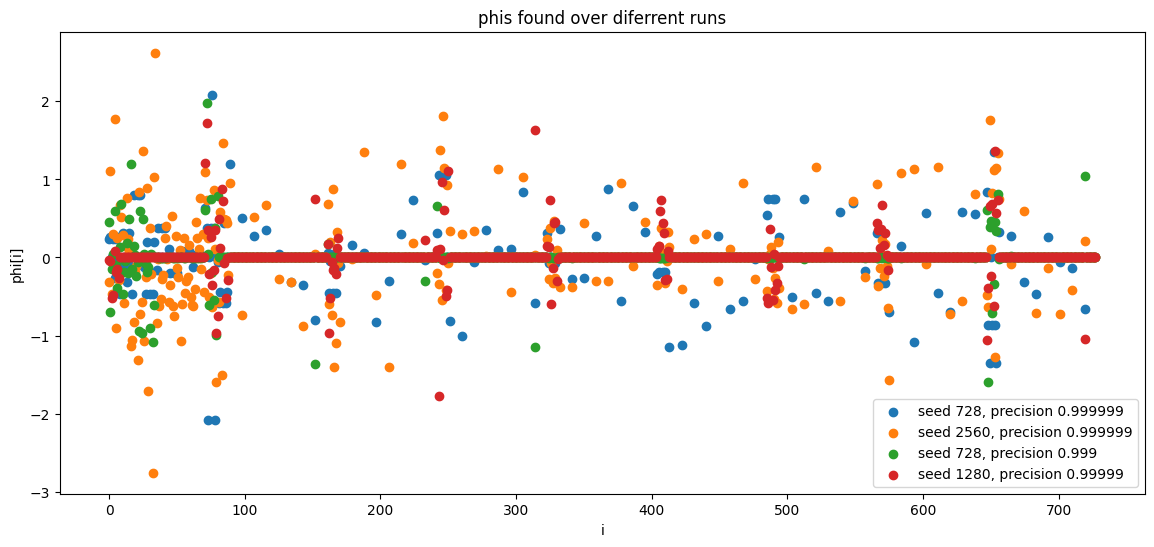

In [71]:
plt.figure(figsize=(14,6))
plt.title("phis found over diferrent runs")
plt.scatter(range(len(final_parameters)), final_parameters, label='seed 728, precision 0.999999')
plt.scatter(range(len(final_parameters)), final_parameters_2560, label='seed 2560, precision 0.999999')
plt.scatter(range(len(final_parameters)), final_parameters_768_999, label='seed 728, precision 0.999')
plt.scatter(range(len(final_parameters)), final_parameters_1280_99999, label='seed 1280, precision 0.99999')
plt.xlabel(f"i")
plt.ylabel(f"phi[i]")
#plt.yscale('log')
plt.legend()
plt.show()